In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [70]:
X_train, X_test, y_train, y_test = load('../../preprocessing/classification_data.joblib')

In [71]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100039 entries, 63829 to 85084
Data columns (total 75 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 100039 non-null  int64  
 1   year                               100039 non-null  int64  
 2   loan_amount                        100039 non-null  int64  
 3   rate_of_interest                   100039 non-null  float64
 4   Interest_rate_spread               100039 non-null  float64
 5   Upfront_charges                    100039 non-null  float64
 6   property_value                     100039 non-null  float64
 7   income                             100039 non-null  float64
 8   Credit_Score                       100039 non-null  int64  
 9   LTV                                100039 non-null  float64
 10  dtir1                              100039 non-null  float64
 11  loan_limit_ncf                     100039

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [73]:
def model_info(y_real, y_pred):
    print('Confusion matrix: \n', confusion_matrix(y_real, y_pred))
    print('Accuracy: ', accuracy_score(y_real, y_pred))
    print('Precision: ', precision_score(y_real, y_pred))
    print('Recall: ', recall_score(y_real, y_pred))
    print('F1: ', f1_score(y_real, y_pred))

In [74]:
def build_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    print('Train:')
    y_train_pred = model.predict(X_train)
    model_info(y_train, y_train_pred)

    print('Test:')
    y_pred = model.predict(X_test)
    model_info(y_test, y_pred)
    
    return model

In [75]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
from sklearn.naive_bayes import MultinomialNB

In [77]:
mnnb = MultinomialNB()

In [78]:
mnnb = build_model(mnnb, X_train, X_test, y_train, y_test)

Train:
Confusion matrix: 
 [[75066   142]
 [13944 10887]]
Accuracy:  0.8591949139835464
Precision:  0.987124852661166
Recall:  0.4384438806330796
F1:  0.6071946458449526
Test:
Confusion matrix: 
 [[32169    63]
 [ 5978  4664]]
Accuracy:  0.8590987544899006
Precision:  0.9866723080177703
Recall:  0.438263484307461
F1:  0.6069360400806818


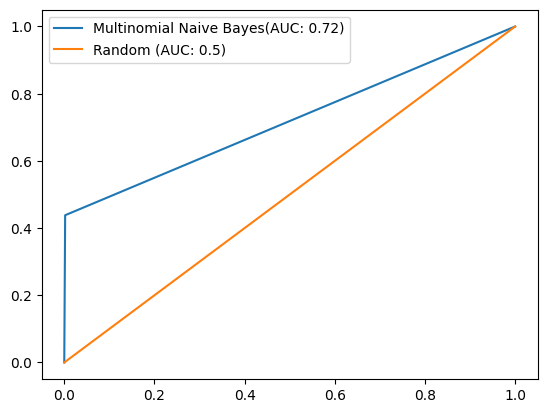

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [mnnb]
model_names = ['Multinomial Naive Bayes']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(AUC: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (AUC: 0.5)')
plt.legend()
plt.show()

In [80]:
from joblib import dump
dump(models, 'Bayes.joblib')

['Bayes.joblib']